In [1]:
import numpy as np
from matplotlib.figure import Figure
from matplotlib import pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pandas as pd
import tkinter as tk
from tkinter import ttk
import numpy as np

In [2]:

dimensions = {
    'Inlet_Width': [300, 300, 300],
    'Tunnel_Width': [90, 100, 110],
    'Length': [[0, 200, 400, 600], [0, 200, 400, 600], [0, 200, 400, 600]],
    # 'Length': [[200, 400, 600], [200, 400, 600], [200, 400, 600]],
    'Fan_Diameter': [80, 90, 100],
    'Fan_Q': [1.5, 1.69, 1.89]
}

pd_dim = pd.DataFrame(dimensions)

# calculate velocity generated by each fan
pd_dim['Fan_Q_m3ps'] = pd_dim['Fan_Q'] / 60.0 * 4
pd_dim['Area_Fan'] = np.pi * (pd_dim['Fan_Diameter'] * 1e-3 / 2)**2 * 4
pd_dim['Fan_Velocity'] = pd_dim['Fan_Q_m3ps'] / pd_dim['Area_Fan']

pd_dim['Outlet_Width'] = pd_dim['Fan_Diameter']*2

pd_dim

,Inlet_Width,Tunnel_Width,Length,Fan_Diameter,Fan_Q,Fan_Q_m3ps,Area_Fan,Fan_Velocity,Outlet_Width
0,300,90,"[0, 200, 400, 600]",80,1.50,0.100000,0.020106,4.973592,160
1,300,100,"[0, 200, 400, 600]",90,1.69,0.112667,0.025447,4.427520,180
2,300,110,"[0, 200, 400, 600]",100,1.89,0.126000,0.031416,4.010705,200


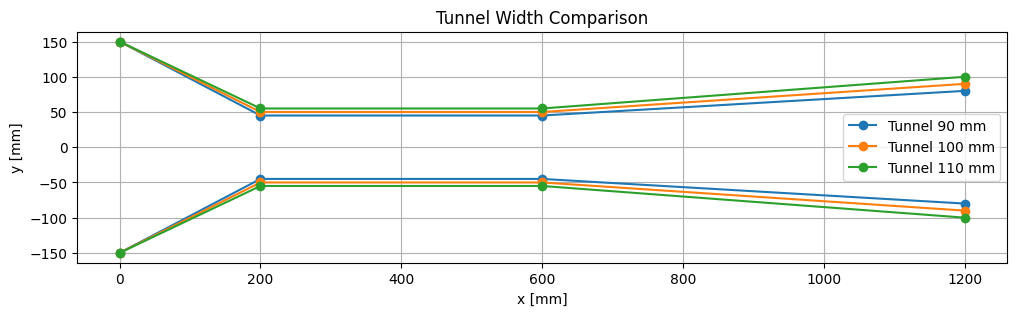

In [3]:
plt.figure(figsize=(12,3))

for i in range(pd_dim.index.stop):
    x = []
    y = [
        pd_dim['Inlet_Width'][i] / 2,
        pd_dim['Tunnel_Width'][i] / 2,
        pd_dim['Tunnel_Width'][i] / 2,
        pd_dim['Outlet_Width'][i] / 2
    ]
    subtotal_length = 0

    for j in range(len(pd_dim.iloc[i].Length)):
        subtotal_length += pd_dim.iloc[i].Length[j]
        x.append(subtotal_length)
        
    top_line, = plt.plot(x, y, marker='o', label=f"Tunnel {pd_dim['Tunnel_Width'][i]} mm")
    color = top_line.get_color()
    plt.plot(x, [-val for val in y], marker='o', color=color)
    
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.title('Tunnel Width Comparison')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

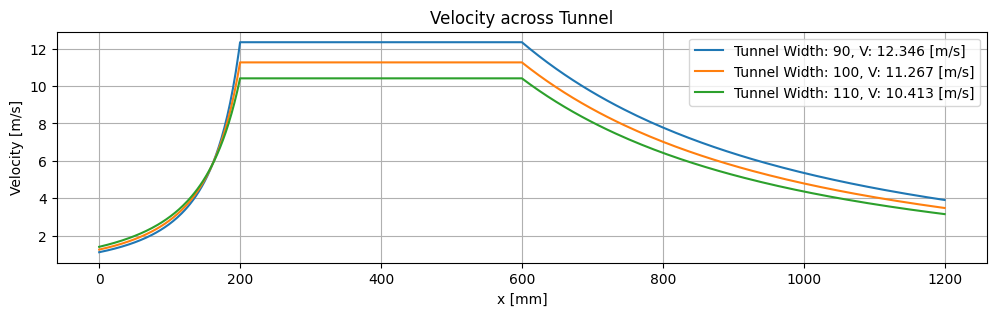

In [4]:
plt.figure(figsize=(12,3))
dx_ls = [] 
dArea_list = [] 
vel_tunnel_ls = []

for i in range(pd_dim.index.stop):
    widths = [
        pd_dim['Inlet_Width'][i] / 2,
        pd_dim['Tunnel_Width'][i] / 2,
        pd_dim['Tunnel_Width'][i] / 2,
        pd_dim['Outlet_Width'][i] / 2
    ]
    subtotal_length = 0

    x_segments = []
    y_segments = []

    interval = 100
    for j in range(len(pd_dim.iloc[i].Length)- 1):
        subtotal = subtotal_length
        subtotal_length += pd_dim.iloc[i].Length[j+1]
        x_segments.append(np.linspace(subtotal, subtotal_length, interval))
        
    for k in range(len(widths) - 1):
        y_segments.append(np.linspace(widths[k], widths[k+1], interval))
        
    x = np.concatenate(x_segments)
    y = np.concatenate(y_segments)
    
    area_y = (y*2*1e-3)**2
    Q_fan = pd_dim["Fan_Q_m3ps"][i]
    vel_tunnel = Q_fan/area_y
    
    dArea_list.append(area_y) 
    vel_tunnel_ls.append(vel_tunnel)
    dx_ls.append(x)
    
    plt.plot(x, vel_tunnel, label=f"Tunnel Width: {pd_dim['Tunnel_Width'][i]}, V: {max(vel_tunnel):.3f} [m/s]")
    
plt.xlabel('x [mm]')
plt.ylabel('Velocity [m/s]')
plt.title('Velocity across Tunnel')
plt.grid(True)
plt.legend()
plt.show()

pd_dim['dx'] = dx_ls
pd_dim['dV_tunnel'] = vel_tunnel_ls
pd_dim['dArea_Tunnel'] = dArea_list
pd_dim['Tunnel Velocity'] = [max(arr) for arr in vel_tunnel_ls]

In [5]:
P_atm = 101325
# density in kg/m^3
air_density = 1.225
tp_ls = [] 

def tunnel_pressure(air_density, P_atm, vel_tunnel):
    return (P_atm -air_density*vel_tunnel**2/2)

fig = plt.figure(figsize=(15, 3))

for i in range(pd_dim.index.stop):
    x = pd_dim['dx'][i]
    vel_tunnel = pd_dim['Vel_Tunnel'][i]
    tunnel_press = tunnel_pressure(air_density, P_atm, vel_tunnel)
    tp_ls.append(tunnel_press)
    
    plt.plot(x,tunnel_press, label=f"Tunnel Width: {pd_dim['Tunnel_Width'][i]}mm, V: {max(vel_tunnel):.3f} [m/s], P: {min(tunnel_press):.1f} [Pa]")
    
plt.title('Pressure along the Tunnel')
plt.xlabel('x [mm]')
plt.ylabel('Tunnel Pressure [Pa]')
plt.legend(fontsize=8)
plt.grid(True)

pd_dim['dP'] = tp_ls
pd_dim['Tunnel_Pressure'] = [min(arr) for arr in tp_ls]

KeyError: 'Vel_Tunnel'

<Figure size 1500x300 with 0 Axes>

In [ ]:
# pd_dim['Tunnel_Pressure']

pd_dim['Tunnel Velocity']


0    12.345679
1    11.266667
2    10.413223
Name: Tunnel Velocity, dtype: float64